# Avacado Project<br>
## Problem Statement:<br>
Avocado is a fruit consumed by people heavily in the United States. <br>

## Content:<br>
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. <br>

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. <br>

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. <br>

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.<br>

Some relevant columns in the dataset:<br>

Date - The date of the observation<br>
AveragePrice - the average price of a single avocado<br>
type - conventional or organic<br>
year - the year<br>
Region - the city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>


# Import libraries and data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.shape

(16468, 13)

We dropped "Unnamed: 0" as it shows only the entries and as the data have been clubbed without resetting index, it's better that we drop them.<br>
There are **16468** rows and **13** columns. Our target feature is **AveragePrice**.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


HOwever, there are no values in most of the rows and values contain only in 1517 rows.

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(1517, 13)

**So the original data is of 1517 rows and 13 columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


1) Date, type and region are in object data type.<br>
2) we will convert date to Datatype datatype.<br>
3) All the other datatype are in float.

# EDA and Preprocessing

In [11]:
df['Date']  = pd.to_datetime(df['Date'])

All the other columns seems important. Year column and year in Date column should be same.<br>
Converted Date datatype to datetime.

In [12]:
df['month'] = df['Date'].dt.month

In [13]:
df['day'] = df['Date'].dt.day

In [14]:
df['week'] = df['Date'].dt.week

Extracted Week number, day of the week and Month of the sale. 

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29,48


Not only the date month would help, let's categories if the sale date was week day or not.

In [16]:
from datetime import datetime

In [17]:
def weekday(datetime):
    day_in = datetime.weekday()
    return day_in

In [18]:
for i in df['Date']:
    df['weekday'] = df['Date'].apply(weekday)

In [19]:
def whichday(day):
    if day in [0.0,1.0,2.0,3.0,4.0]:
        return 0
    else:
        return 1
# 0 is for weekday and 1 is for weekend.
df['whichday'] = df['weekday'].apply(whichday)

Created a new column which shows if the sale was on weekdays or weekend.

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,week,weekday,whichday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27,52,6,1
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20,51,6,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13,50,6,1
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12,24,4,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29,48,6,1


In [21]:
df['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

We will drop the Date, day columns.

In [22]:
df.drop(['Date', 'day'], axis=1, inplace=True)

In [23]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,week,weekday,whichday
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,52,6,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,51,6,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,50,6,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,24,4,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,48,6,1


**NOTE:**<br>
    1) We created new column whichday to understand if the sales are more in weekends or weekdays.<br>
    2) Same is with month, week (Week Number) and year.<br>

In [24]:
df['year'] = df['year'].astype(int)

We have cleaned the data, let's look into these data and gather insights.

In [25]:
df['AveragePrice'].describe()

count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

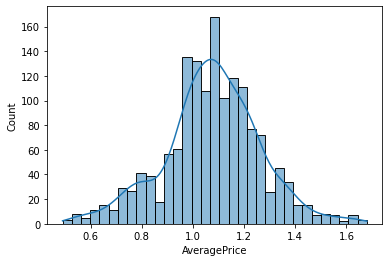

In [26]:
sns.histplot(df['AveragePrice'], kde=True)

AveragePrice ranges from 0.49 to 1.68 and follow a normal distribution. 0.9 to 1.3 show most of the AveragePrice in the data.

In [27]:
df['region'].unique().shape

(51,)

So region column has 51 regions.  

<AxesSubplot:xlabel='region', ylabel='count'>

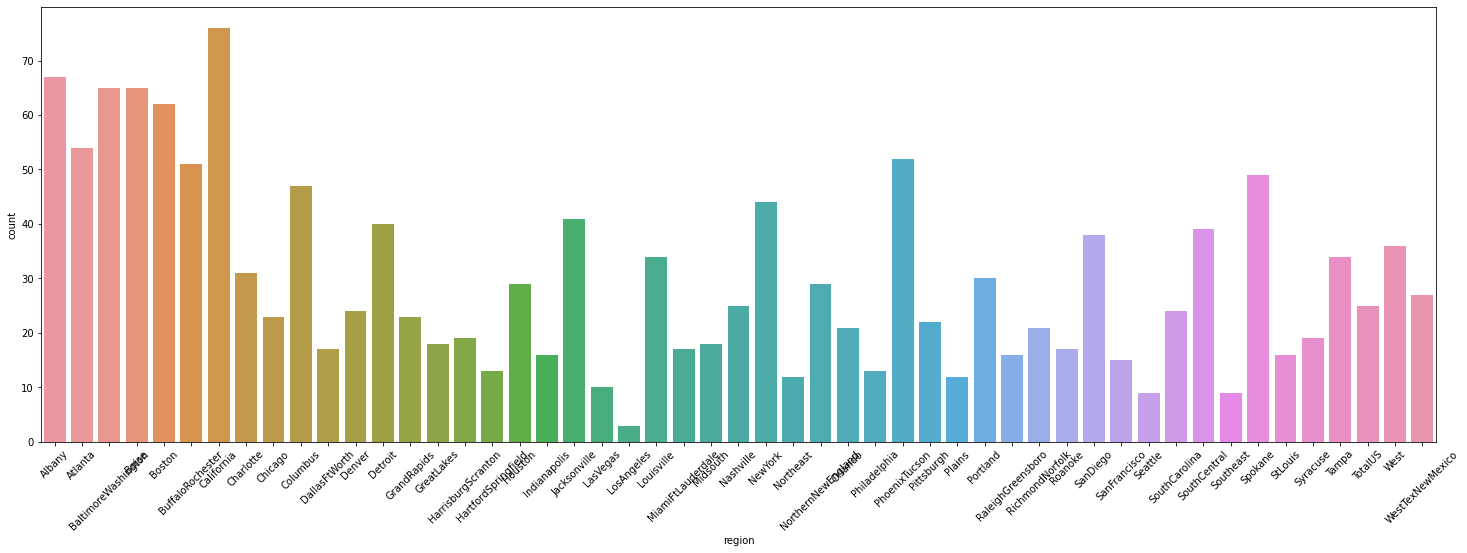

In [28]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.countplot(df['region'])

This plot gives us the entries from each of the categories (region).

In [29]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

This column has no use for us this has only one category. We will drop this column.

In [30]:
df.drop('type', axis=1, inplace=True)

<AxesSubplot:xlabel='AveragePrice', ylabel='4770'>

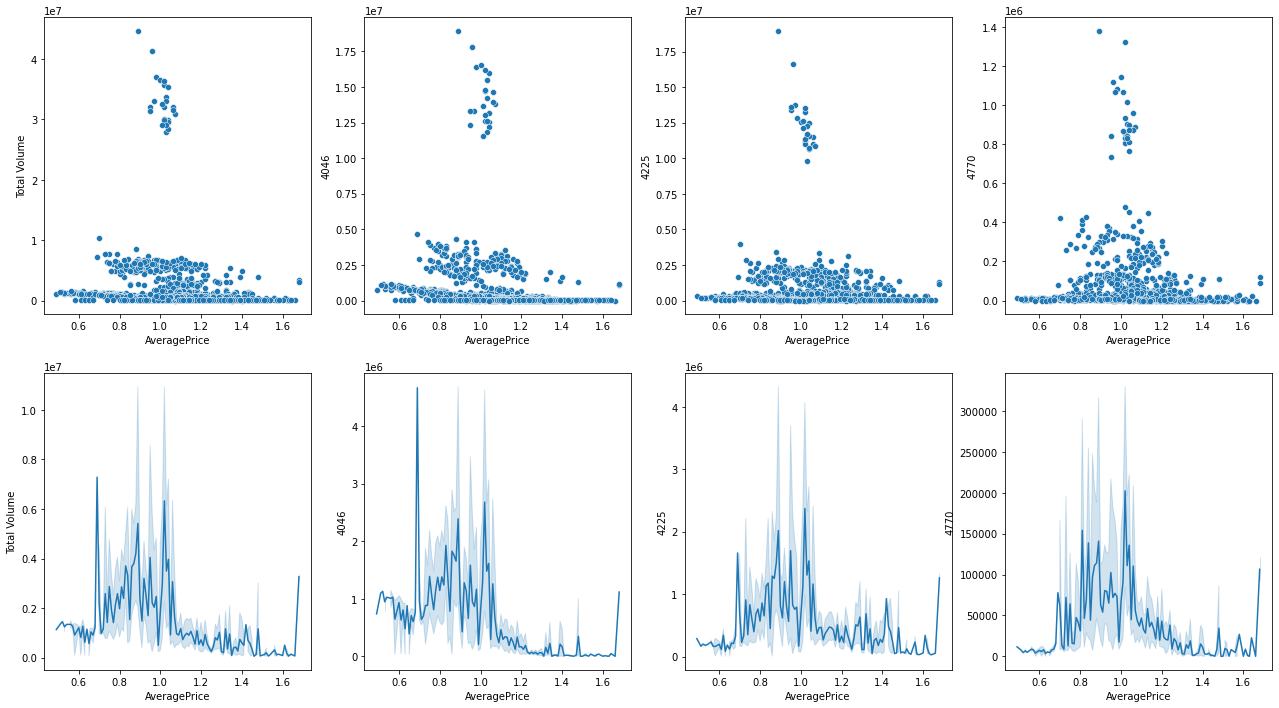

In [31]:
figure, axes = plt.subplots(2,4, figsize=(22,12))
sns.scatterplot(ax=axes[0,0], data=df, x= 'AveragePrice', y= 'Total Volume')
sns.scatterplot(ax=axes[0,1], data=df, x= 'AveragePrice', y= '4046')
sns.scatterplot(ax=axes[0,2], data=df, x= 'AveragePrice', y= '4225')
sns.scatterplot(ax=axes[0,3], data=df, x= 'AveragePrice', y= '4770')
sns.lineplot(ax=axes[1,0], data=df, x= 'AveragePrice', y= 'Total Volume')
sns.lineplot(ax=axes[1,1], data=df, x= 'AveragePrice', y= '4046')
sns.lineplot(ax=axes[1,2], data=df, x= 'AveragePrice', y= '4225')
sns.lineplot(ax=axes[1,3], data=df, x= 'AveragePrice', y= '4770')

All the above 4 features have less volumes as the average price increases. This would be expected.

<AxesSubplot:xlabel='AveragePrice', ylabel='XLarge Bags'>

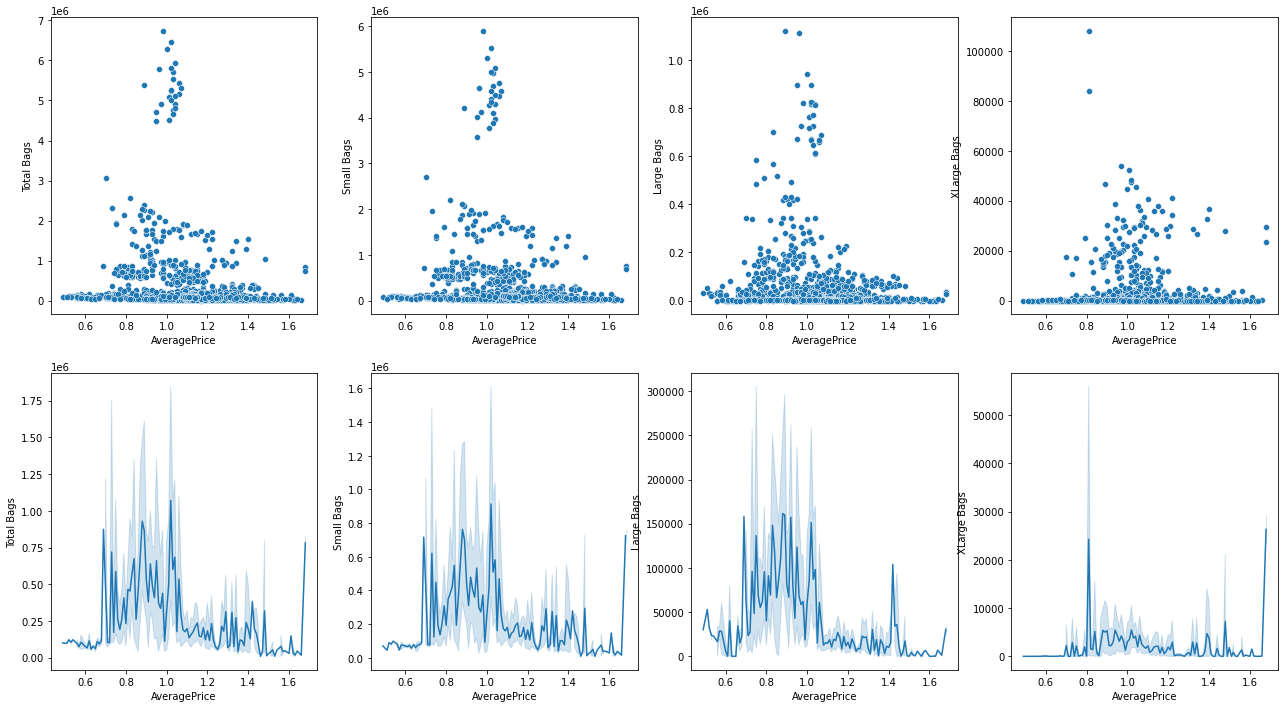

In [32]:
figure, axes = plt.subplots(2,4, figsize=(22,12))
sns.scatterplot(ax=axes[0,0], data=df, x= 'AveragePrice', y= 'Total Bags')
sns.scatterplot(ax=axes[0,1], data=df, x= 'AveragePrice', y= 'Small Bags')
sns.scatterplot(ax=axes[0,2], data=df, x= 'AveragePrice', y= 'Large Bags')
sns.scatterplot(ax=axes[0,3], data=df, x= 'AveragePrice', y= 'XLarge Bags')
sns.lineplot(ax=axes[1,0], data=df, x= 'AveragePrice', y= 'Total Bags')
sns.lineplot(ax=axes[1,1], data=df, x= 'AveragePrice', y= 'Small Bags')
sns.lineplot(ax=axes[1,2], data=df, x= 'AveragePrice', y= 'Large Bags')
sns.lineplot(ax=axes[1,3], data=df, x= 'AveragePrice', y= 'XLarge Bags')

Xlarge Bags was used less, however, not so less. Total Bags is the sum of all the three bags.

<AxesSubplot:xlabel='year', ylabel='count'>

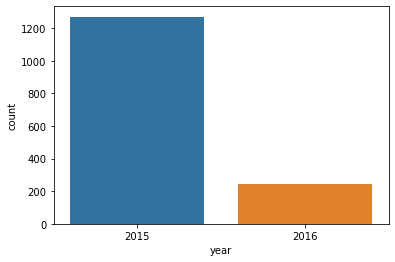

In [33]:
sns.countplot(df['year'])

Most of the sales data are from 2015.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

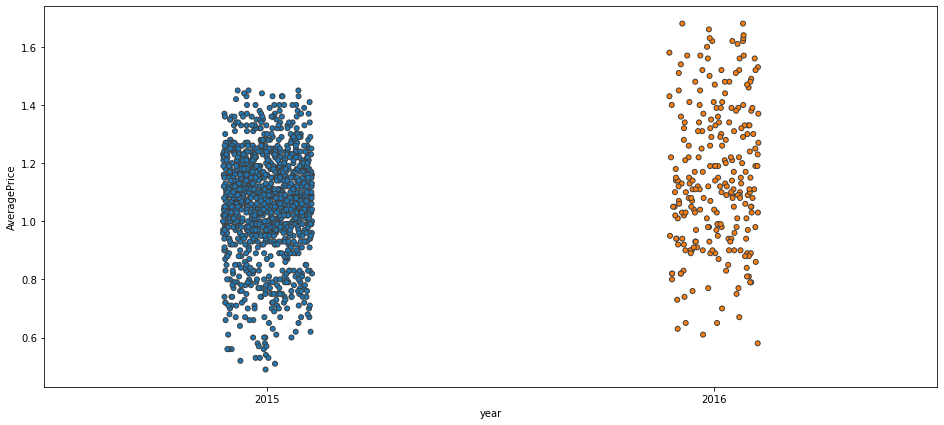

In [34]:
plt.figure(figsize=(16,7))
sns.stripplot(df['year'], df['AveragePrice'], linewidth=1)

The average price of avocado sold in 2015 is from 0.6 to 1.4, whereas the avocado sold in 2016 range even higher.

<AxesSubplot:xlabel='year', ylabel='4770'>

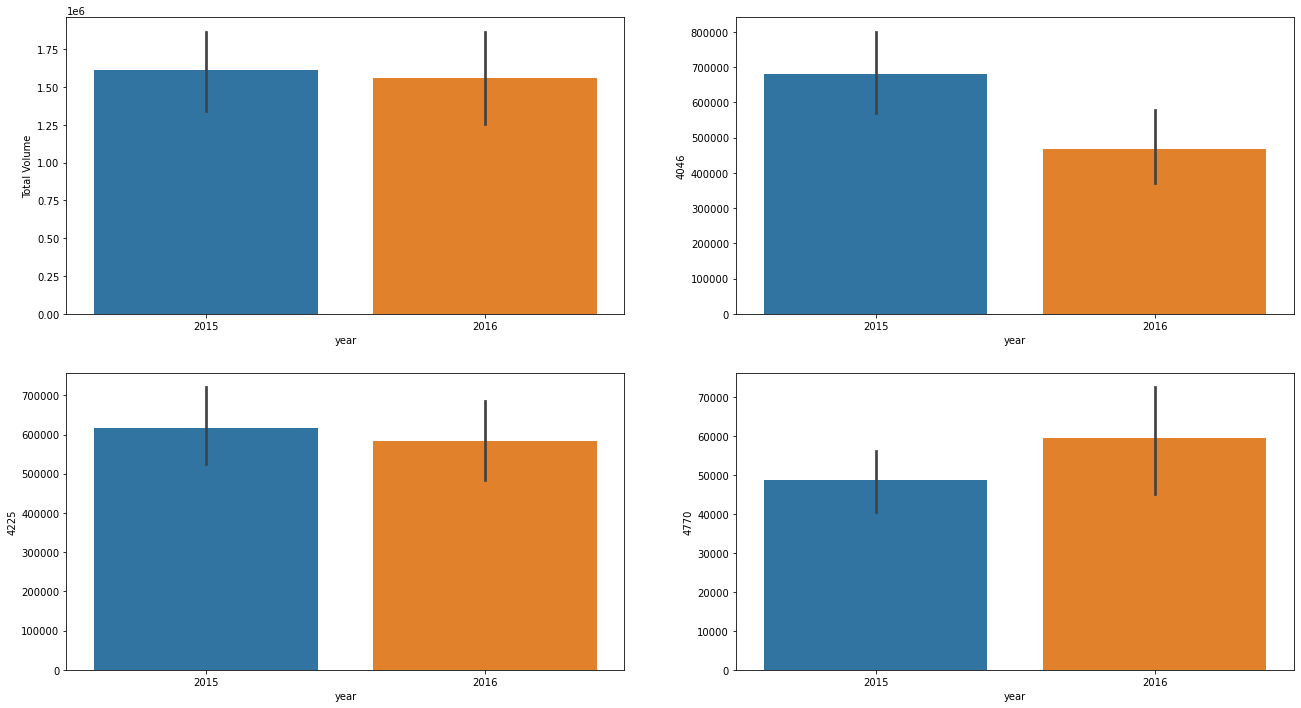

In [35]:
figure, axes = plt.subplots(2,2, figsize=(22,12))
sns.barplot(ax=axes[0,0], data=df, x= 'year', y= 'Total Volume')
sns.barplot(ax=axes[0,1], data=df, x= 'year', y= '4046')
sns.barplot(ax=axes[1,0], data=df, x= 'year', y= '4225')
sns.barplot(ax=axes[1,1], data=df, x= 'year', y= '4770')

In 2015, "4770" has less sales and in 2016 "4046" has less sales. 

<AxesSubplot:xlabel='year', ylabel='XLarge Bags'>

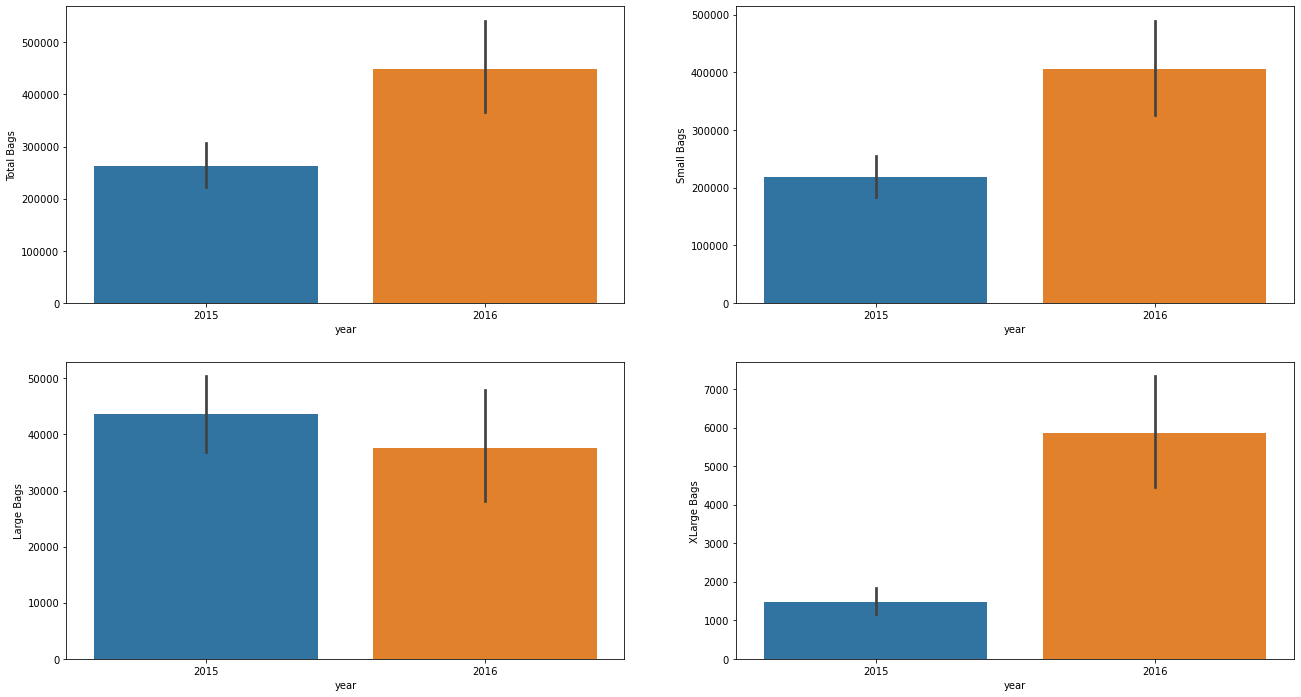

In [36]:
figure, axes = plt.subplots(2,2, figsize=(22,12))
sns.barplot(ax=axes[0,0], data=df, x= 'year', y= 'Total Bags')
sns.barplot(ax=axes[0,1], data=df, x= 'year', y= 'Small Bags')
sns.barplot(ax=axes[1,0], data=df, x= 'year', y= 'Large Bags')
sns.barplot(ax=axes[1,1], data=df, x= 'year', y= 'XLarge Bags')

In 2015 - Total Bags, Small Bags and Xlarge Bags were used less. Mainly Xlarge Bags were used less.<br>
In 2016 all the bags were comparetively equally used.

<AxesSubplot:xlabel='whichday', ylabel='count'>

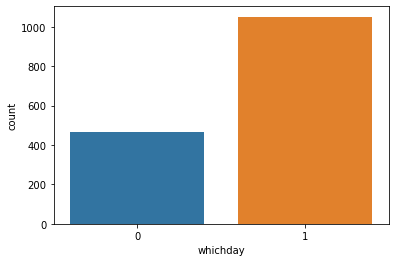

In [37]:
sns.countplot(df['whichday'])

Sales of Avocado were more on Weekends by more than 50%

<AxesSubplot:xlabel='whichday', ylabel='AveragePrice'>

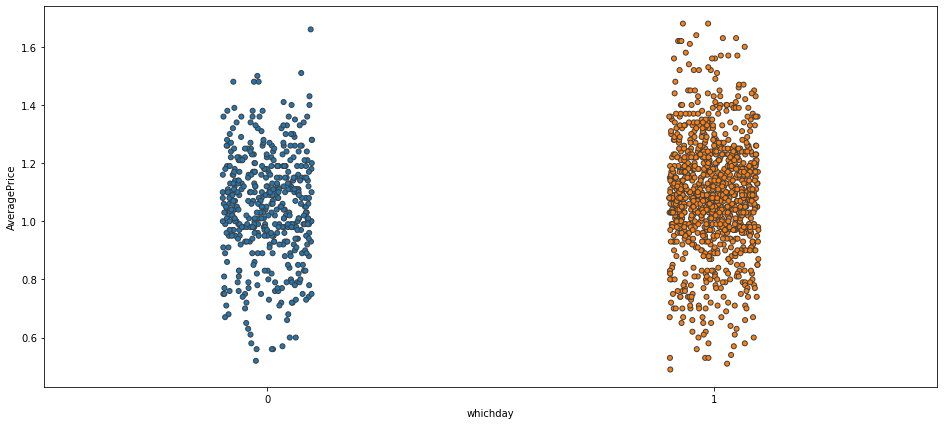

In [38]:
plt.figure(figsize=(16,7))
sns.stripplot(df['whichday'], df['AveragePrice'], linewidth=1)

Even the Average price has more range on Weekends. This would be expected.

<AxesSubplot:xlabel='whichday', ylabel='4770'>

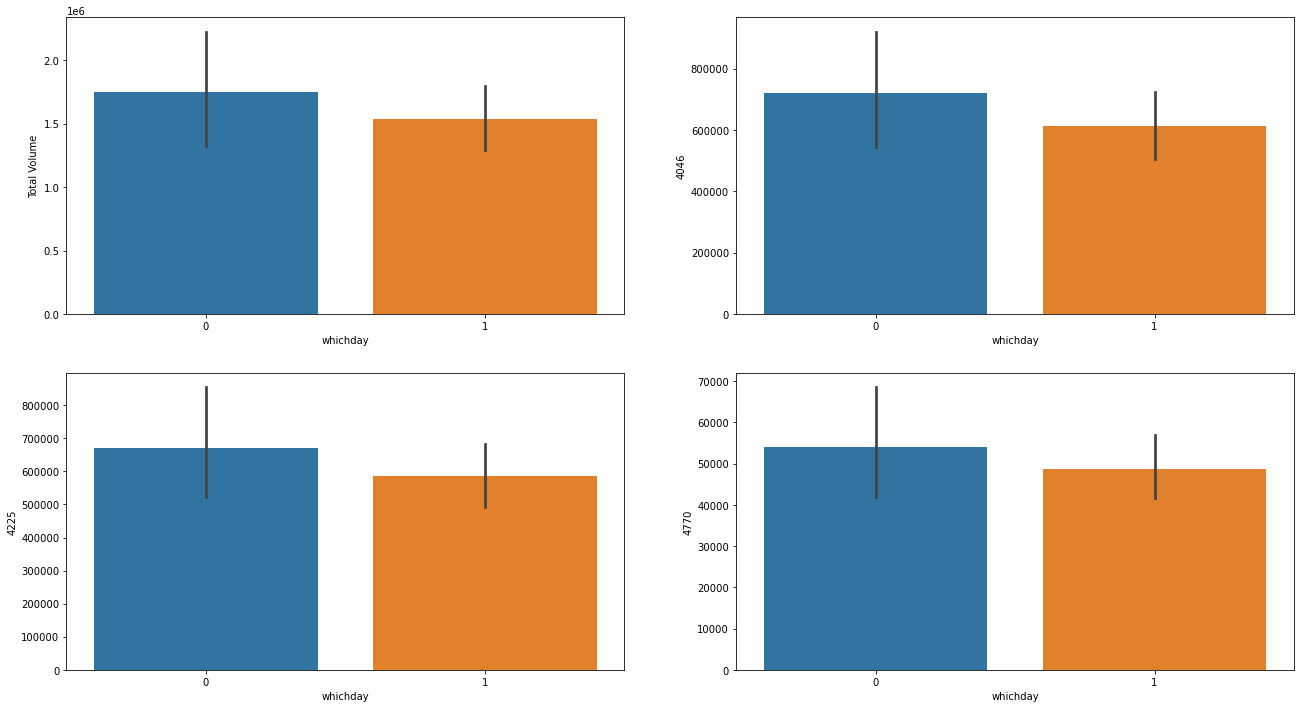

In [39]:
figure, axes = plt.subplots(2,2, figsize=(22,12))
sns.barplot(ax=axes[0,0], data=df, x= 'whichday', y= 'Total Volume')
sns.barplot(ax=axes[0,1], data=df, x= 'whichday', y= '4046')
sns.barplot(ax=axes[1,0], data=df, x= 'whichday', y= '4225')
sns.barplot(ax=axes[1,1], data=df, x= 'whichday', y= '4770')

<AxesSubplot:xlabel='whichday', ylabel='XLarge Bags'>

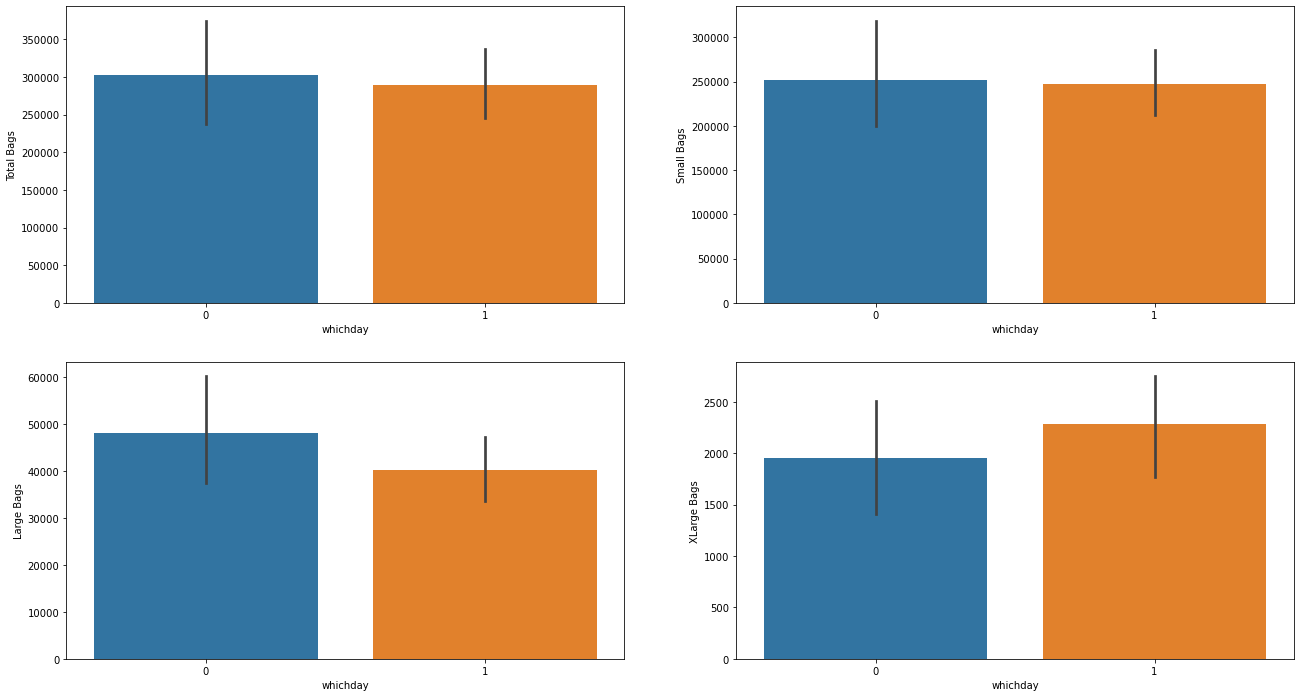

In [40]:
figure, axes = plt.subplots(2,2, figsize=(22,12))
sns.barplot(ax=axes[0,0], data=df, x= 'whichday', y= 'Total Bags')
sns.barplot(ax=axes[0,1], data=df, x= 'whichday', y= 'Small Bags')
sns.barplot(ax=axes[1,0], data=df, x= 'whichday', y= 'Large Bags')
sns.barplot(ax=axes[1,1], data=df, x= 'whichday', y= 'XLarge Bags')

The above two plots shows that the uncertaintity for sales data in weekend.

<AxesSubplot:xlabel='weekday', ylabel='AveragePrice'>

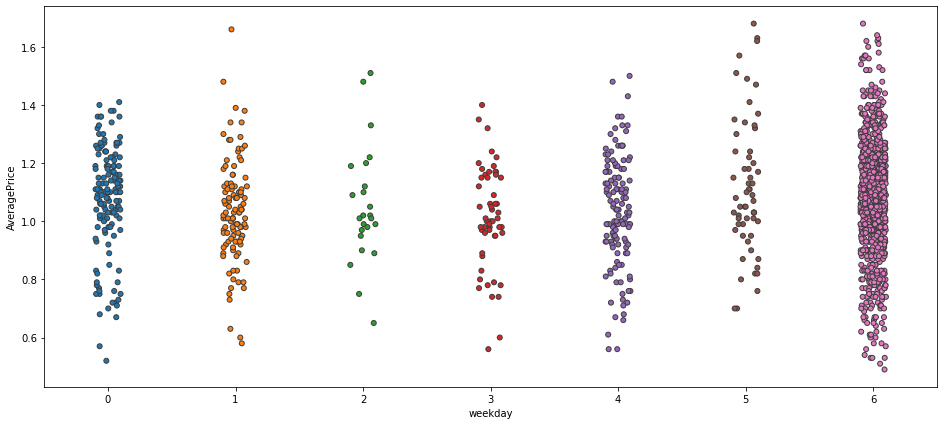

In [41]:
plt.figure(figsize=(16,7))
sns.stripplot(df['weekday'], df['AveragePrice'], linewidth=1)

This shows that the sale of Avocado is more on Sunday and least on Wednesday and Thrusday.

<AxesSubplot:xlabel='weekday', ylabel='4770'>

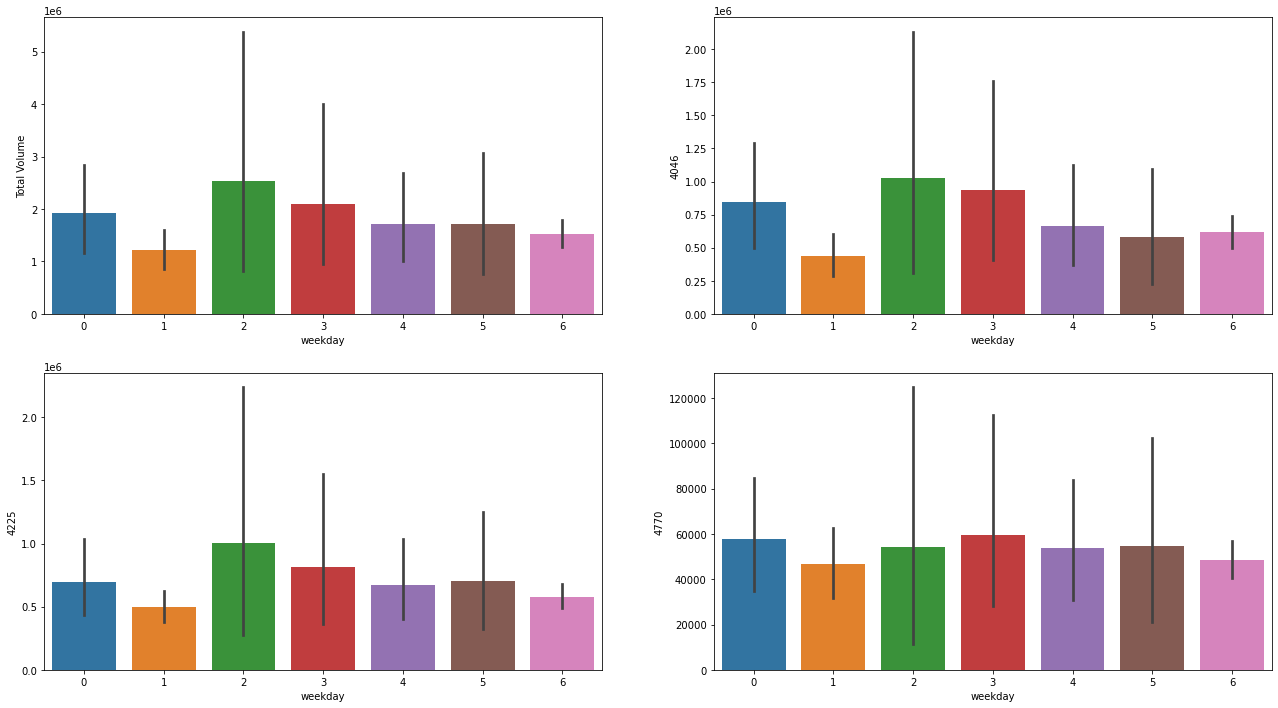

In [42]:
figure, axes = plt.subplots(2,2, figsize=(22,12))
sns.barplot(ax=axes[0,0], data=df, x= 'weekday', y= 'Total Volume')
sns.barplot(ax=axes[0,1], data=df, x= 'weekday', y= '4046')
sns.barplot(ax=axes[1,0], data=df, x= 'weekday', y= '4225')
sns.barplot(ax=axes[1,1], data=df, x= 'weekday', y= '4770')

For Wednesday(2) the error bar is high for all the 4 features above. Next it is the same with Thursday(3).<br>
On weekend(5), that is Saturday 4770 sales has more level of uncertainty(error bar).

<AxesSubplot:xlabel='weekday', ylabel='XLarge Bags'>

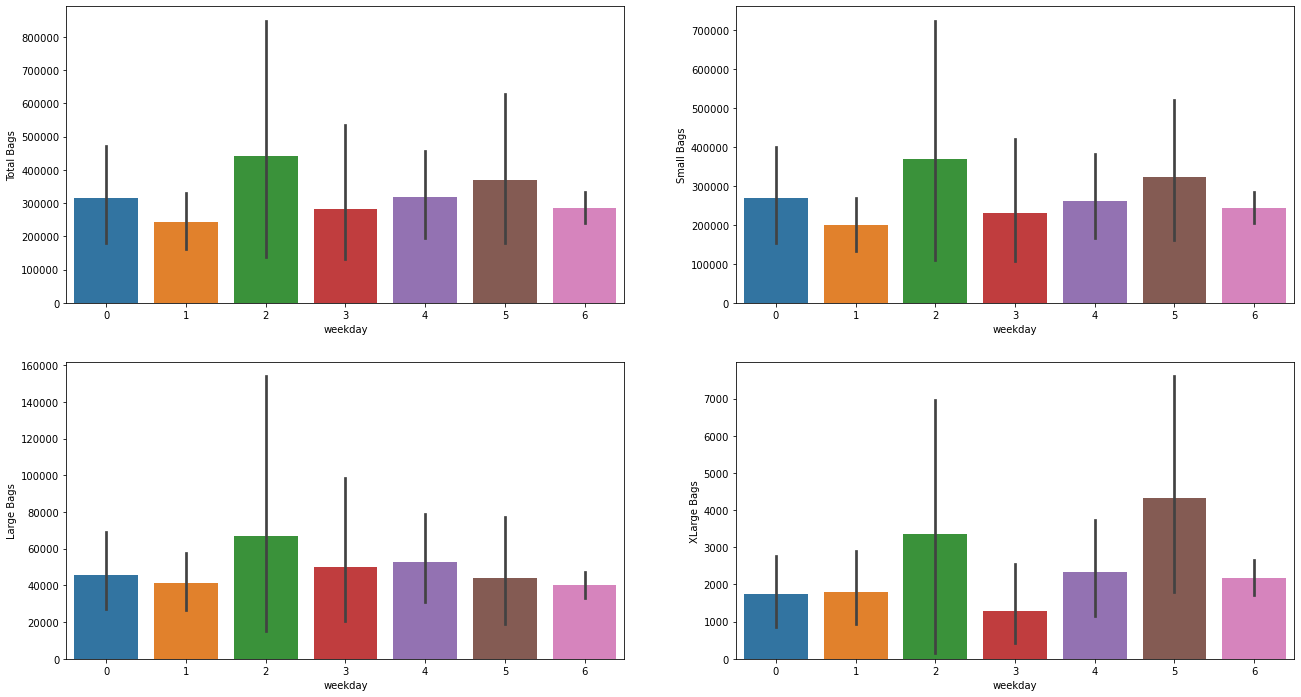

In [43]:
figure, axes = plt.subplots(2,2, figsize=(22,12))
sns.barplot(ax=axes[0,0], data=df, x= 'weekday', y= 'Total Bags')
sns.barplot(ax=axes[0,1], data=df, x= 'weekday', y= 'Small Bags')
sns.barplot(ax=axes[1,0], data=df, x= 'weekday', y= 'Large Bags')
sns.barplot(ax=axes[1,1], data=df, x= 'weekday', y= 'XLarge Bags')

For the bags, there is a huge error bar for Wednesday(2. Next the same goes with Saturday(5)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

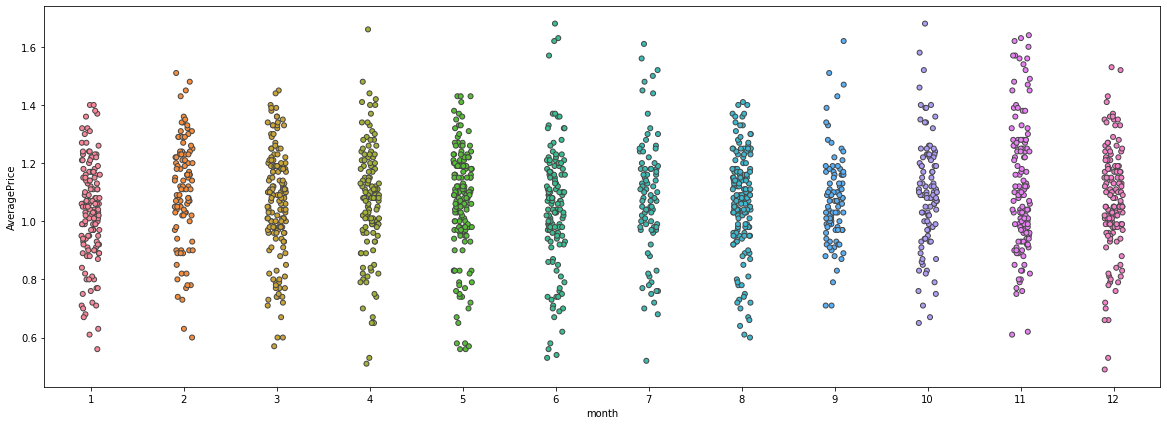

In [44]:
plt.figure(figsize=(20,7))
sns.stripplot(df['month'], df['AveragePrice'], linewidth=1)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

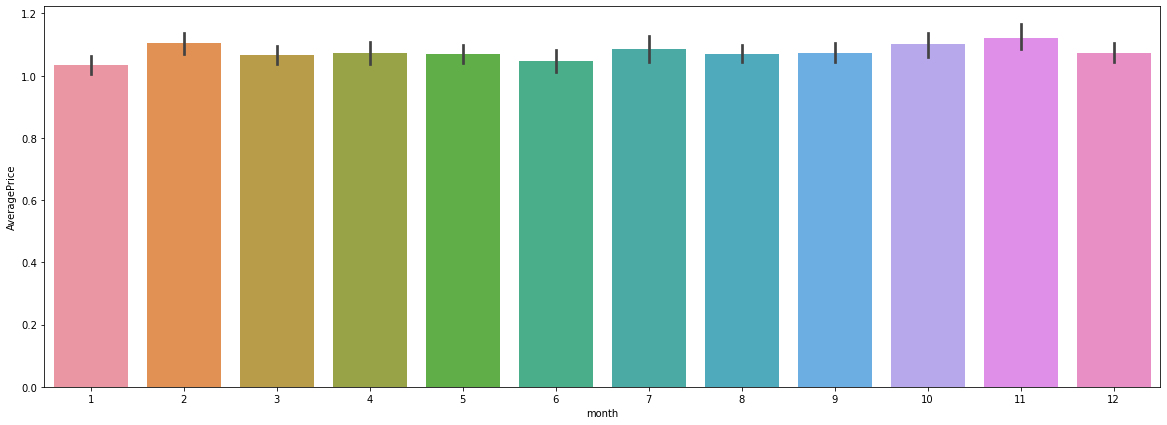

In [45]:
plt.figure(figsize=(20,7))
sns.barplot(df['month'], df['AveragePrice'], linewidth=1)

In [46]:
df.groupby('month')['AveragePrice'].sum()

month
1     145.92
2     110.54
3     168.58
4     132.87
5     171.35
6     140.35
7      94.45
8     168.14
9      97.75
10    107.84
11    147.03
12    145.94
Name: AveragePrice, dtype: float64

July and September months show less sales and the highest sales are in March month.

<AxesSubplot:>

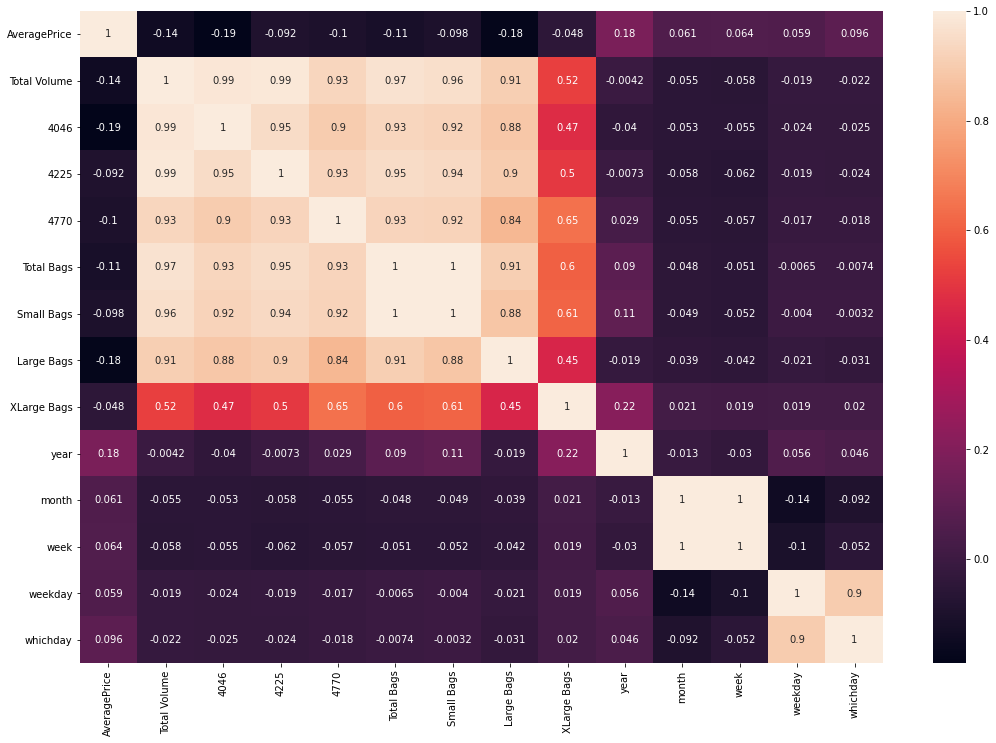

In [47]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, )

We see very low correlation with our target feature. We will not drop any features and move forward.

# outliers and Skewness.

In [48]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
month           0.101439
week            0.084743
weekday        -1.297576
whichday       -0.836741
dtype: float64

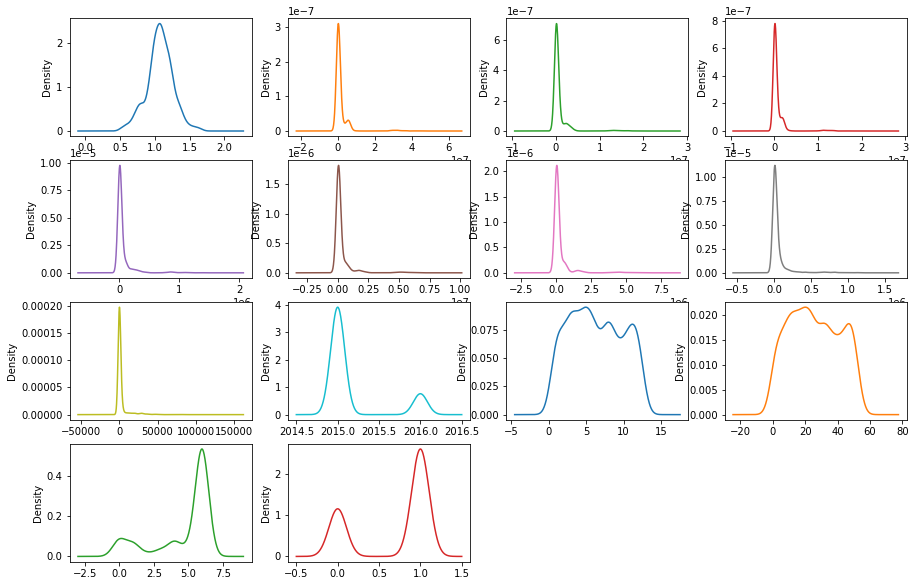

In [49]:
df.plot(kind="density", subplots =True, layout=(4,4), sharex=False, legend =False, figsize=(15,10))
plt.show()

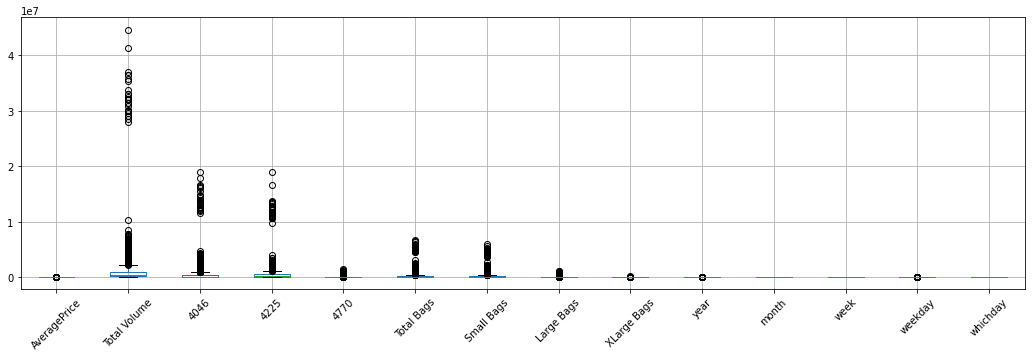

In [50]:
df.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

## Using get_dummies on region column.

In [51]:
dummies = pd.get_dummies(df['region'], drop_first=True)

In [52]:
merged = pd.concat([df,dummies], axis='columns')

In [53]:
merged.drop('region', axis=1, inplace=True)

## Outlier reduction with zscore

In [54]:
from scipy.stats import zscore
z = np.abs(zscore(merged))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.12944509, 0.15590991,
        0.13461354],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.12944509, 0.15590991,
        0.13461354],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.12944509, 0.15590991,
        0.13461354],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.12944509, 0.15590991,
        0.13461354],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.12944509, 0.15590991,
        0.13461354],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.12944509, 0.15590991,
        0.13461354]])

In [55]:
Thresold = 3
print(np.where(z>3))

(array([  52,   53,   54, ..., 1514, 1515, 1516], dtype=int64), array([14, 14, 14, ..., 20, 20, 20], dtype=int64))


In [56]:
data = merged[(z<3).all(axis=1)]

In [57]:
data.shape

(67, 64)

In [58]:
merged.shape

(1517, 64)

In [59]:
df.shape

(1517, 15)

Using zscore method wouldn't be logical here as it loses most of the data.

## Treating outliers and skewness using IQR method.

In [60]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()
    
#function for Cube root transformation Technique

def cuberoot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/3)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("cuberoot_transform")
        plt.show()

#function for Square root transformation Technique

def fifthroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/5)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("fifthroot_transform")
        plt.show()

## Column AveragePrice

In [61]:
merged['AveragePrice'].describe()

count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='AveragePrice'>

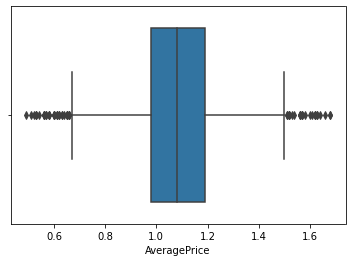

In [62]:
sns.boxplot(merged['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

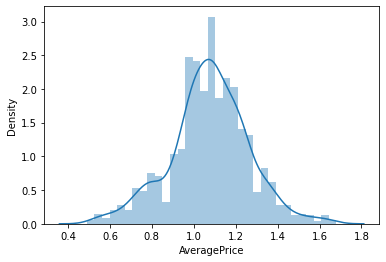

In [63]:
sns.distplot(merged['AveragePrice'])

In [64]:
outlier_normally(merged, 'AveragePrice')

(0.5083164150075781, 1.641663809118987)

In [65]:
merged[merged['AveragePrice']>1.641663809118987].shape

(3, 64)

In [66]:
merged[merged['AveragePrice']<0.5083164150075781].shape

(1, 64)

In [67]:
merged = merged[merged['AveragePrice']<=1.641663809118987]

In [68]:
merged = merged[merged['AveragePrice']>=0.5083164150075781]

In [69]:
merged['AveragePrice'].skew()

-0.14598258379441406

Treated outlier and skewness in place.

## Column Total Volume

In [70]:
merged['Total Volume'].describe()

count    1.513000e+03
mean     1.600995e+06
std      4.438397e+06
min      3.875074e+04
25%      1.474700e+05
50%      4.024664e+05
75%      9.783761e+05
max      4.465546e+07
Name: Total Volume, dtype: float64

<AxesSubplot:xlabel='Total Volume'>

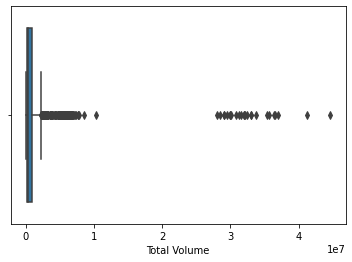

In [71]:
sns.boxplot(merged['Total Volume'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

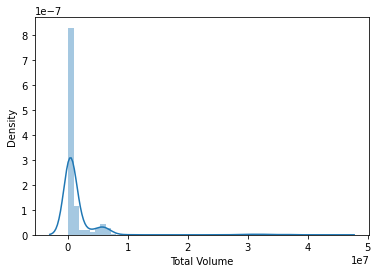

In [72]:
sns.distplot(merged['Total Volume'])

In [73]:
outlier_normally(merged, 'Total Volume')

(-11714194.753842272, 14916185.161509164)

In [74]:
merged[merged['Total Volume']>14916185.161509164].shape

(25, 64)

In [75]:
merged = merged[merged['Total Volume']<=14916185.161509164]

In [76]:
merged['AveragePrice'].skew()

-0.16056214178195244

Treated skewness and outliers is in place. Let's move to next column

## Column 4046

In [77]:
merged['4046'].describe()

count    1.488000e+03
mean     4.180280e+05
std      8.094773e+05
min      4.677200e+02
25%      1.991350e+04
50%      7.797221e+04
75%      3.251702e+05
max      4.668965e+06
Name: 4046, dtype: float64

<AxesSubplot:xlabel='4046'>

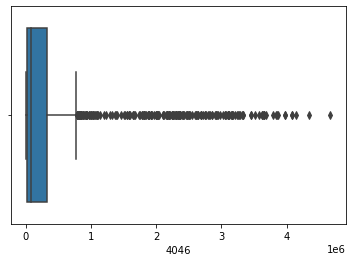

In [78]:
sns.boxplot(merged['4046'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

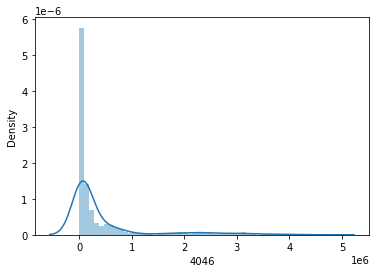

In [79]:
sns.distplot(merged['4046'])

In [80]:
outlier_normally(merged, '4046')

(-2010403.7767063596, 2846459.7574321674)

In [81]:
merged[merged['4046']>2846459.7574321674].shape

(53, 64)

In [82]:
merged = merged[merged['4046']<=2846459.7574321674]

In [83]:
merged['AveragePrice'].skew()

-0.20256620035290868

Treated Outliers and skweness is in place.

## Column 4225

In [84]:
merged['4225'].describe()

count    1.435000e+03
mean     3.593520e+05
std      5.695638e+05
min      1.783770e+03
25%      4.012340e+04
50%      9.974605e+04
75%      4.081060e+05
max      3.354877e+06
Name: 4225, dtype: float64

<AxesSubplot:xlabel='4225'>

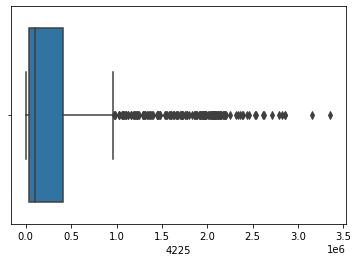

In [85]:
sns.boxplot(merged['4225'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

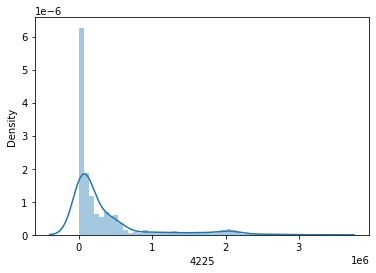

In [86]:
sns.distplot(merged['4225'])

In [87]:
outlier_normally(merged, '4225')

(-1349339.5026369365, 2068043.4717240445)

In [88]:
merged[merged['4225']>2068043.4717240445].shape

(46, 64)

In [89]:
merged = merged[merged['4225']<=2068043.4717240445]

In [90]:
merged['4225'].skew()

2.3936682995798675

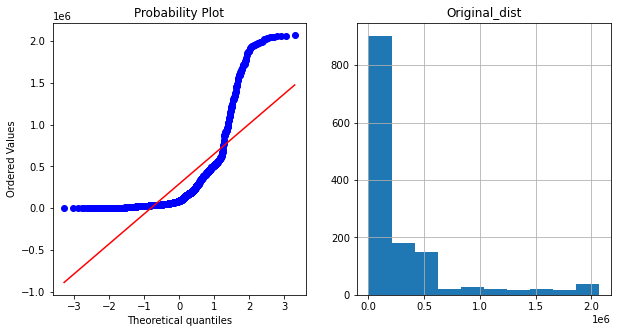

In [91]:
original_dist(merged, '4225')

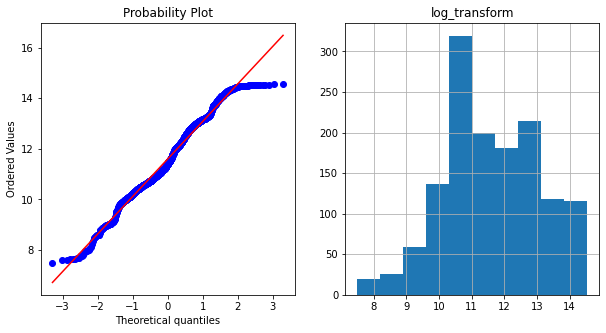

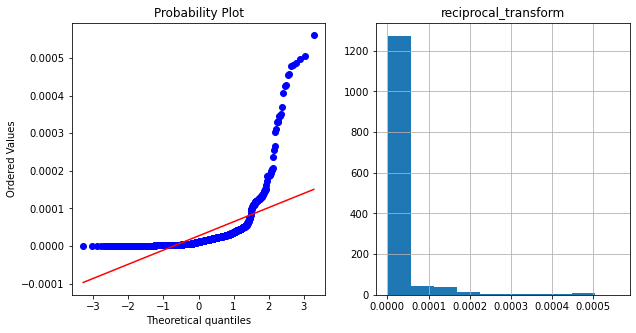

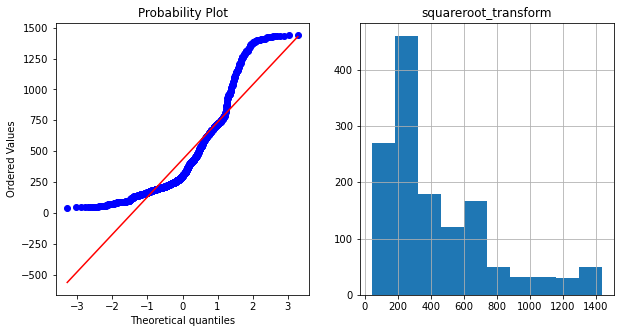

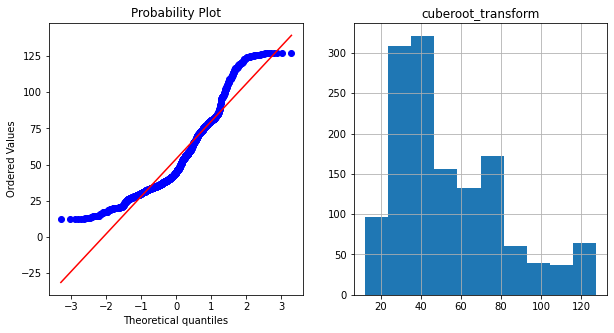

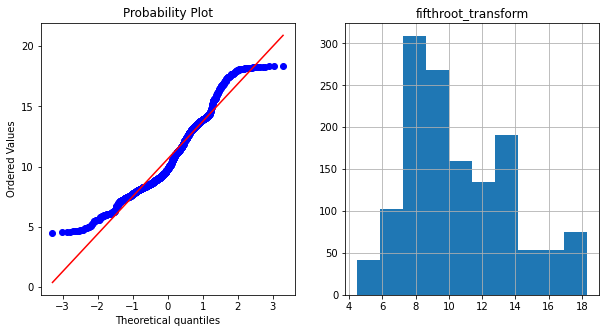

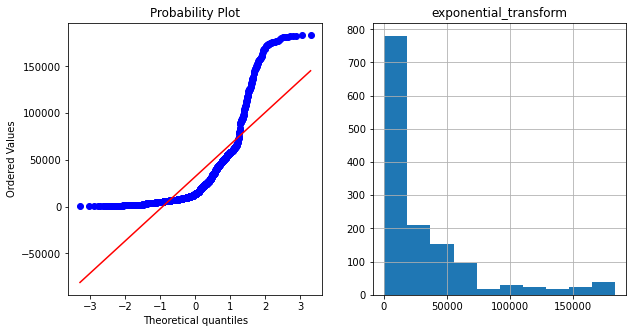

In [92]:
log_transform(merged,'4225')

reciprocal_transform(merged, '4225')

squareroot_transform(merged,'4225')

cuberoot_transform(merged,'4225')

fifthroot_transform(merged,'4225')

exponential_transform(merged, '4225')

In [93]:
merged['4225'] = np.log(merged['4225'])
merged['4225'].skew()

-0.04061322099046123

Treated Outliers and skewness.

## Column 4770

In [94]:
merged['4770'].describe()

count      1389.000000
mean      26498.325277
std       57310.021230
min           0.000000
25%         721.460000
50%        5986.260000
75%       19097.990000
max      447117.420000
Name: 4770, dtype: float64

<AxesSubplot:xlabel='4770'>

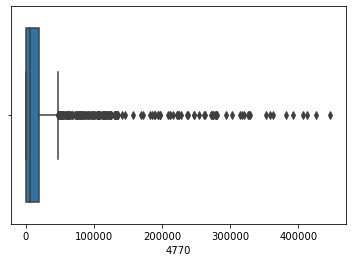

In [95]:
 sns.boxplot(merged['4770'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

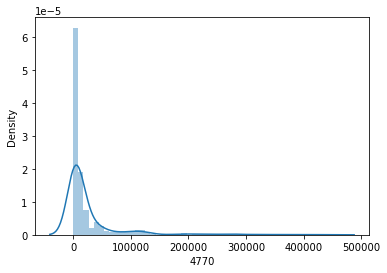

In [96]:
 sns.distplot(merged['4770'])

In [97]:
outlier_normally(merged, '4770')

(-145431.73841404097, 198428.3889683966)

In [98]:
merged[merged['4770']>198428.3889683966].shape

(41, 64)

In [99]:
merged = merged[merged['4770']<=198428.3889683966]

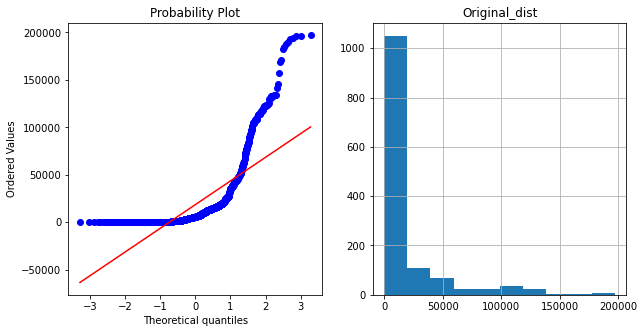

In [100]:
original_dist(merged, '4770')

In [101]:
log_transform(merged,'4770')

reciprocal_transform(merged, '4770')

squareroot_transform(merged,'4770')

cuberoot_transform(merged,'4770')

fifthroot_transform(merged,'4770')

exponential_transform(merged, '4770')

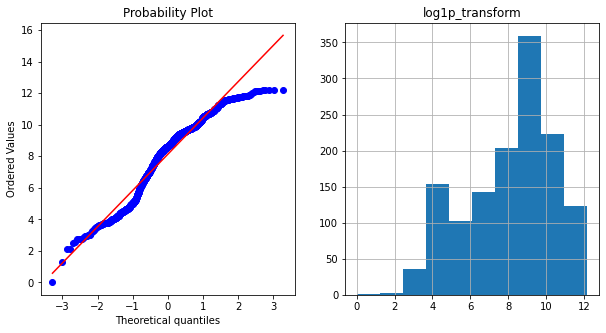

In [102]:
log1p_transform(merged, '4770')

In [103]:
merged['4770'].skew()

2.82395578694598

In [104]:
merged['4770'] = np.log1p(merged['4770'])
merged['4770'].skew()

-0.5193446858001015

Treated skewness.

## Column Total Bags

In [105]:
merged['Total Bags'].describe()

count    1.348000e+03
mean     1.222178e+05
std      2.204180e+05
min      3.311770e+03
25%      3.285232e+04
50%      6.569697e+04
75%      1.120433e+05
max      2.001072e+06
Name: Total Bags, dtype: float64

<AxesSubplot:xlabel='Total Bags'>

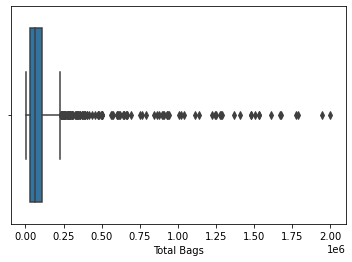

In [106]:
sns.boxplot(merged['Total Bags'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

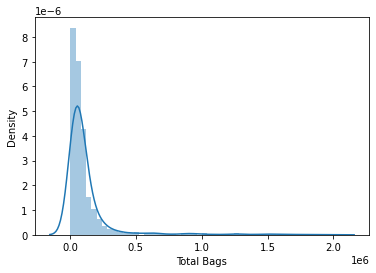

In [107]:
sns.distplot(merged['Total Bags'])

In [108]:
outlier_normally(merged, 'Total Bags')

(-539036.033084485, 783471.6921200934)

In [109]:
merged[merged['Total Bags']>783471.6921200934].shape

(36, 64)

In [110]:
merged = merged[merged['Total Bags']<=783471.6921200934]

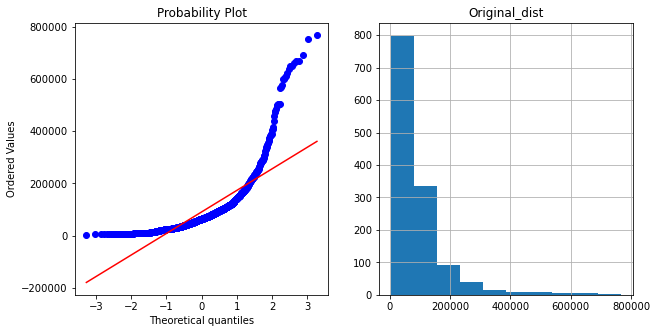

In [111]:
original_dist(merged, 'Total Bags')

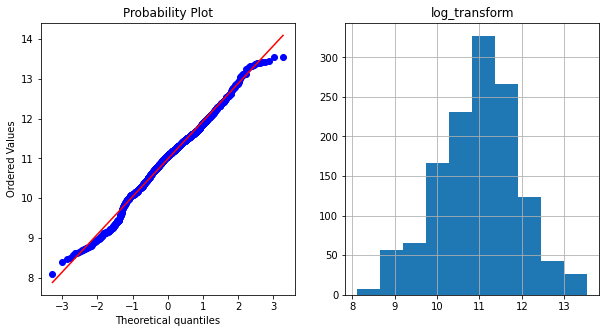

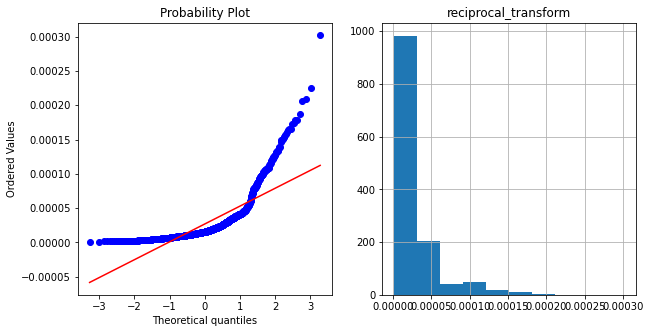

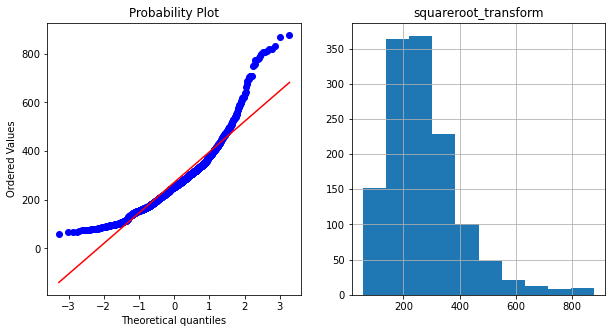

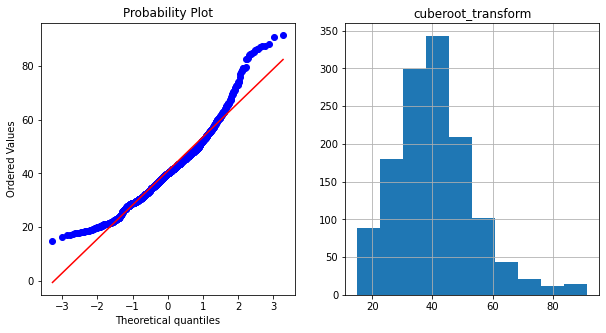

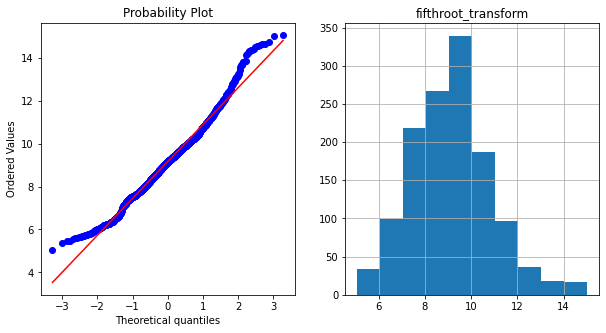

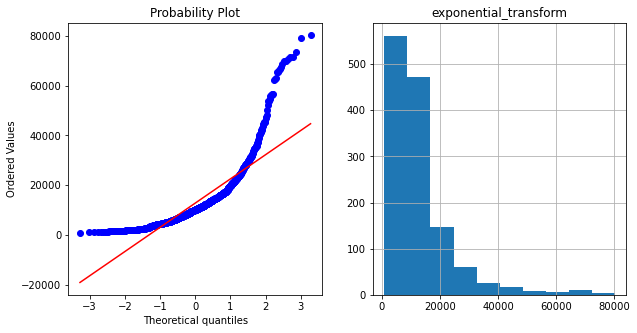

In [112]:
log_transform(merged,'Total Bags')

reciprocal_transform(merged, 'Total Bags')

squareroot_transform(merged,'Total Bags')

cuberoot_transform(merged,'Total Bags')

fifthroot_transform(merged,'Total Bags')

exponential_transform(merged, 'Total Bags')

In [113]:
merged['Total Bags'] = np.log(merged['Total Bags'])
merged['Total Bags'].skew()

-0.16518615333771194

Treated Outliers and skewness

## Columns Small Bags

In [114]:
merged['Small Bags'].describe()

count      1312.000000
mean      76627.421654
std       85040.229743
min        3311.770000
25%       25363.167500
50%       50886.520000
75%       89215.715000
max      688965.800000
Name: Small Bags, dtype: float64

<AxesSubplot:xlabel='Small Bags'>

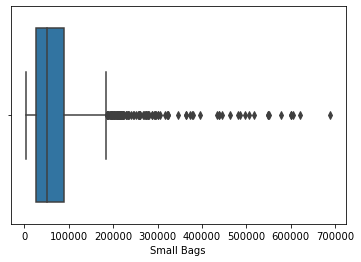

In [115]:
sns.boxplot(merged['Small Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

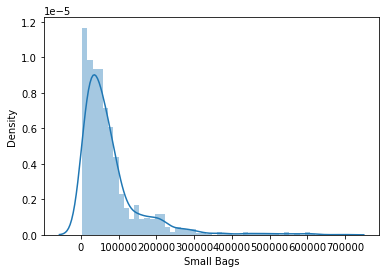

In [116]:
sns.distplot(merged['Small Bags'])

In [117]:
outlier_normally(merged, 'Small Bags')

(-178493.2675735532, 331748.1108814801)

In [118]:
merged[merged['Small Bags']>331748.1108814801].shape

(26, 64)

In [119]:
merged = merged[merged['Small Bags']<=331748.1108814801]

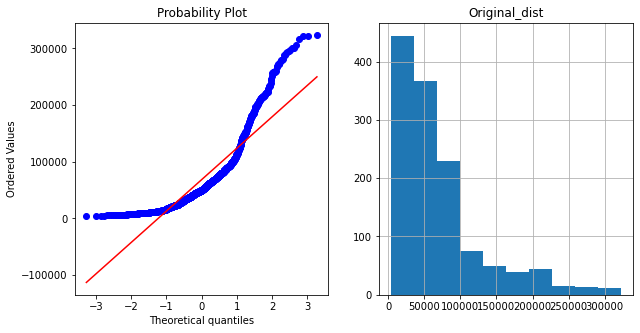

In [120]:
original_dist(merged, 'Small Bags')

In [121]:
merged['Small Bags'].skew()

1.695043124123338

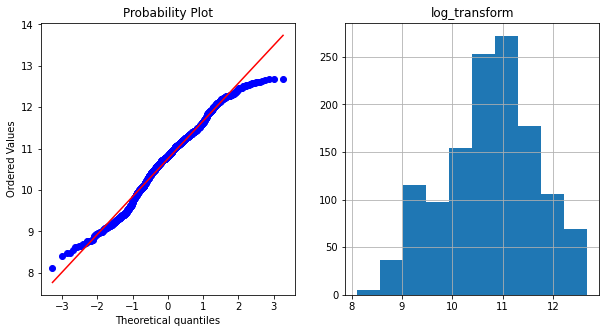

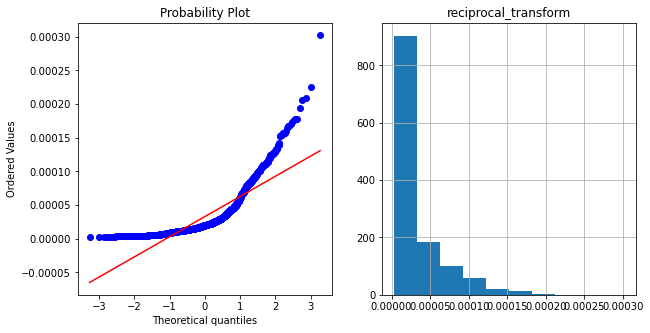

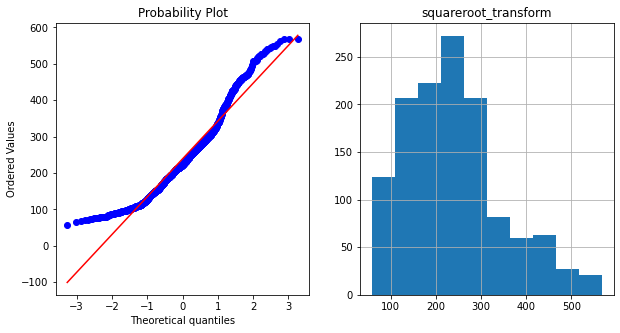

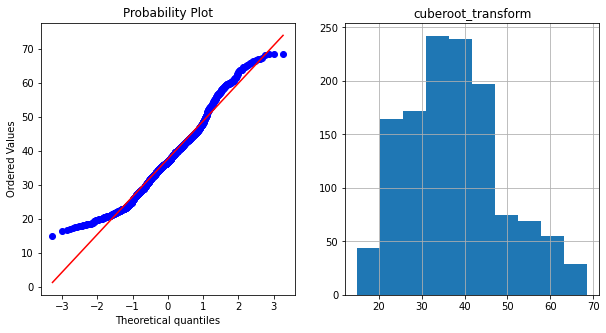

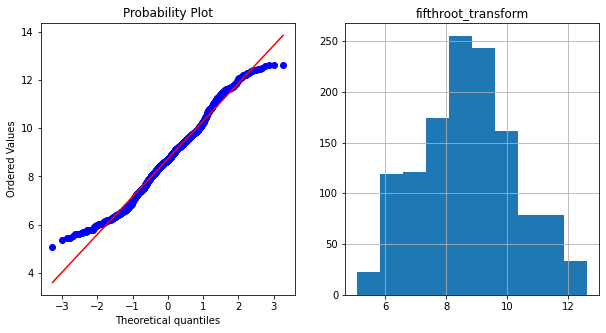

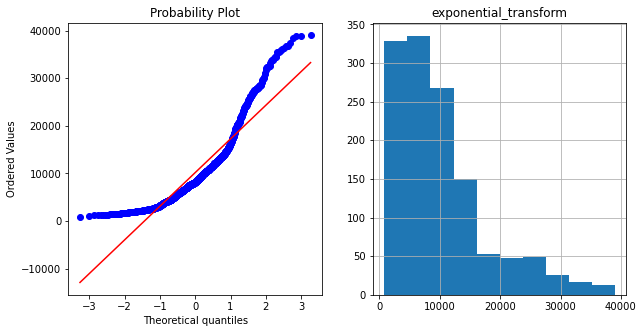

In [122]:
log_transform(merged,'Small Bags')

reciprocal_transform(merged, 'Small Bags')

squareroot_transform(merged,'Small Bags')

cuberoot_transform(merged,'Small Bags')

fifthroot_transform(merged,'Small Bags')

exponential_transform(merged, 'Small Bags')

In [123]:
merged['Small Bags'] = np.log(merged['Small Bags'])
merged['Small Bags'].skew()

-0.22822880026829817

Treated outliers and skewness.

## Column Large Bags

In [124]:
merged['Large Bags'].describe()

count      1286.000000
mean      12400.106306
std       24789.197980
min           0.000000
25%         321.820000
50%        3100.075000
75%       13453.677500
max      280910.700000
Name: Large Bags, dtype: float64

<AxesSubplot:xlabel='Large Bags'>

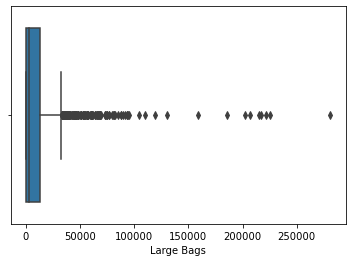

In [125]:
sns.boxplot(merged['Large Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

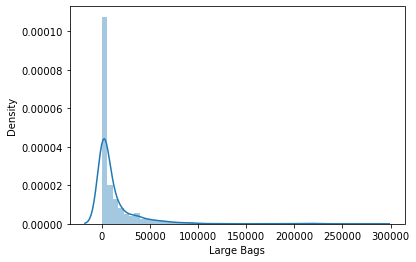

In [126]:
sns.distplot(merged['Large Bags'])

In [127]:
outlier_normally(merged, 'Large Bags')

(-61967.48763495601, 86767.70024770872)

In [128]:
merged[merged['Large Bags']>86767.70024770872].shape

(21, 64)

In [129]:
merged = merged[merged['Large Bags']<=86767.70024770872]

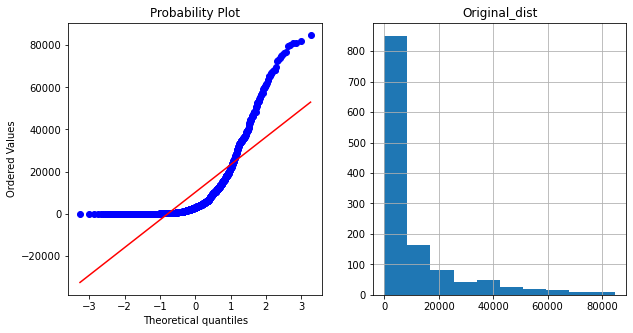

In [130]:
original_dist(merged, 'Large Bags')

In [131]:
log_transform(merged,'Large Bags')

reciprocal_transform(merged, 'Large Bags')

squareroot_transform(merged,'Large Bags')

cuberoot_transform(merged,'Large Bags')

fifthroot_transform(merged,'Large Bags')

exponential_transform(merged, 'Large Bags')

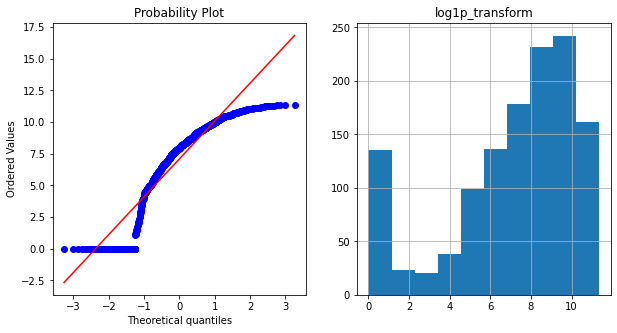

In [132]:
log1p_transform(merged, 'Large Bags')

In [133]:
merged['Large Bags'] = np.log1p(merged['Large Bags'])

## Column XLarge Bags

In [134]:
merged['XLarge Bags'].describe()

count     1265.000000
mean       546.438933
std       2047.542861
min          0.000000
25%          0.000000
50%          0.000000
75%         65.130000
max      22744.870000
Name: XLarge Bags, dtype: float64

<AxesSubplot:xlabel='XLarge Bags'>

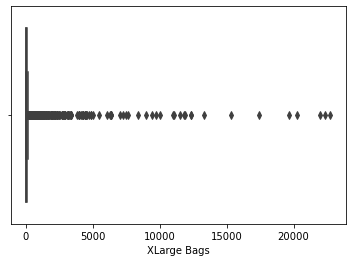

In [135]:
sns.boxplot(merged['XLarge Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

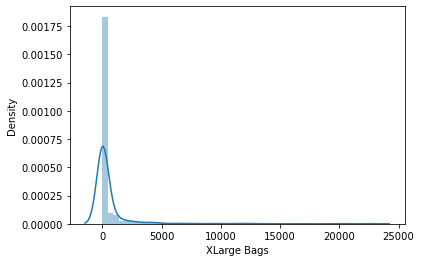

In [136]:
sns.distplot(merged['XLarge Bags'])

In [137]:
outlier_normally(merged, 'XLarge Bags')

(-5596.1896494673865, 6689.067515080033)

In [138]:
merged[merged['XLarge Bags']>6689.067515080033].shape

(24, 64)

In [139]:
merged = merged[merged['XLarge Bags']<=6689.067515080033]

In [140]:
merged['XLarge Bags'] = np.log1p(merged['XLarge Bags'])

In [141]:
merged.shape

(1241, 64)

'year', 'month','week', 'weekday', 'whichday' are categorical features. Let's move forward.

Let's divide the data.

In [142]:
x = merged.drop('AveragePrice', axis=1)
y = merged['AveragePrice']

Let's standardize the data

In [143]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

# Model Building

## Finding the best random state for the model


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [146]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8223334937199525 on random state 1


So the best random state would be 1.

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [148]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 0.006587262316831508
mean_absolute_error: 0.06285178512837501
r2_score: 0.8223334937199525
0.7628446455354743


In [149]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 0.011678714859437748
mean_absolute_error: 0.07349397590361445
r2_score: 0.6850108031047377
1.0


In [150]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 0.00547597947791165
mean_absolute_error: 0.05506867469879522
r2_score: 0.8523061485169807
0.9753342028108004


In [151]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 0.009736674698795182
mean_absolute_error: 0.07559839357429719
r2_score: 0.7373899970401737
0.8262544038228143


In [152]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 0.0073354461240460935
mean_absolute_error: 0.06818321184448439
r2_score: 0.8021540630718864
0.8382644988977456


In [153]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 0.01308853481800517
mean_absolute_error: 0.092695870778365
r2_score: 0.6469862377428051
0.6922183241504382


In [154]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 0.0071735458345213495
mean_absolute_error: 0.0667150763479334
r2_score: 0.8065207115249308
0.8513875462453547


Clearly, Random forest Regression has the best perfomance. Let's Crossvalidate.

## Crossvalidation

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: -1.4505984106720085e+26


In [157]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.24476653173268223


In [158]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : -0.35659734395017006


In [159]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: -0.9736459029930042


In [160]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: -0.058721920788652814


In [161]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.2774432705275595


In [162]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.14216915694574178


Random Forest Regression Stands out. Let's perform HyperParameter Tuning.

## Hyperparameter Tuning

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
#Creating parameter list to pass in GridsearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [165]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150]})

In [167]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 150}

## Model


In [168]:
model = RandomForestRegressor(n_estimators=150, criterion='mse', max_depth=9, max_features='auto')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred)*100)

80.9874676434351


This would be the best performance attained for this problem. We will now save the model.

## Saving the Model

In [169]:
import joblib
joblib.dump(model,"avocado_project_submission.pkl")

['avocado_project_submission.pkl']